You can use this refference:

A., Chen. (2024). Deep Learning in Real Estate Prediction: An Empirical Study on
California House Prices.  The National High School Journal of Science. 1-13.


Fard, V.B.(2025). Housing price prediction using deep neural networks:A case study on california data. International journal of operations research and artificial intelligence, 1 (1), 47-53.

In [222]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [223]:
df = pd.read_csv('./housing.csv')

df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [224]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [225]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [226]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

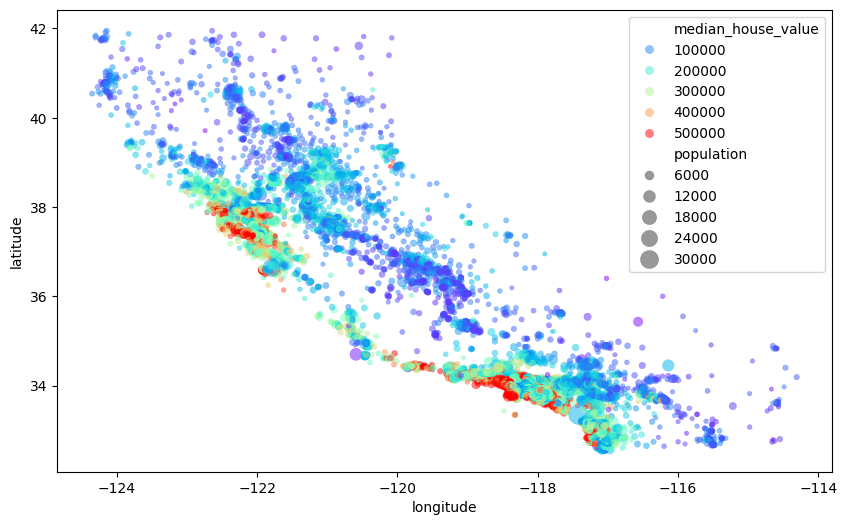

In [227]:
plt.figure(figsize=(10,6))

scatter = sns.scatterplot(
    data=df,
    x='longitude',
    y='latitude',
    hue='median_house_value',
    size='population',
    sizes=(10, 200),  # Adjust min/max size of points
    palette='rainbow',
    alpha=0.5,
    edgecolor=None,
    legend='brief'
)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

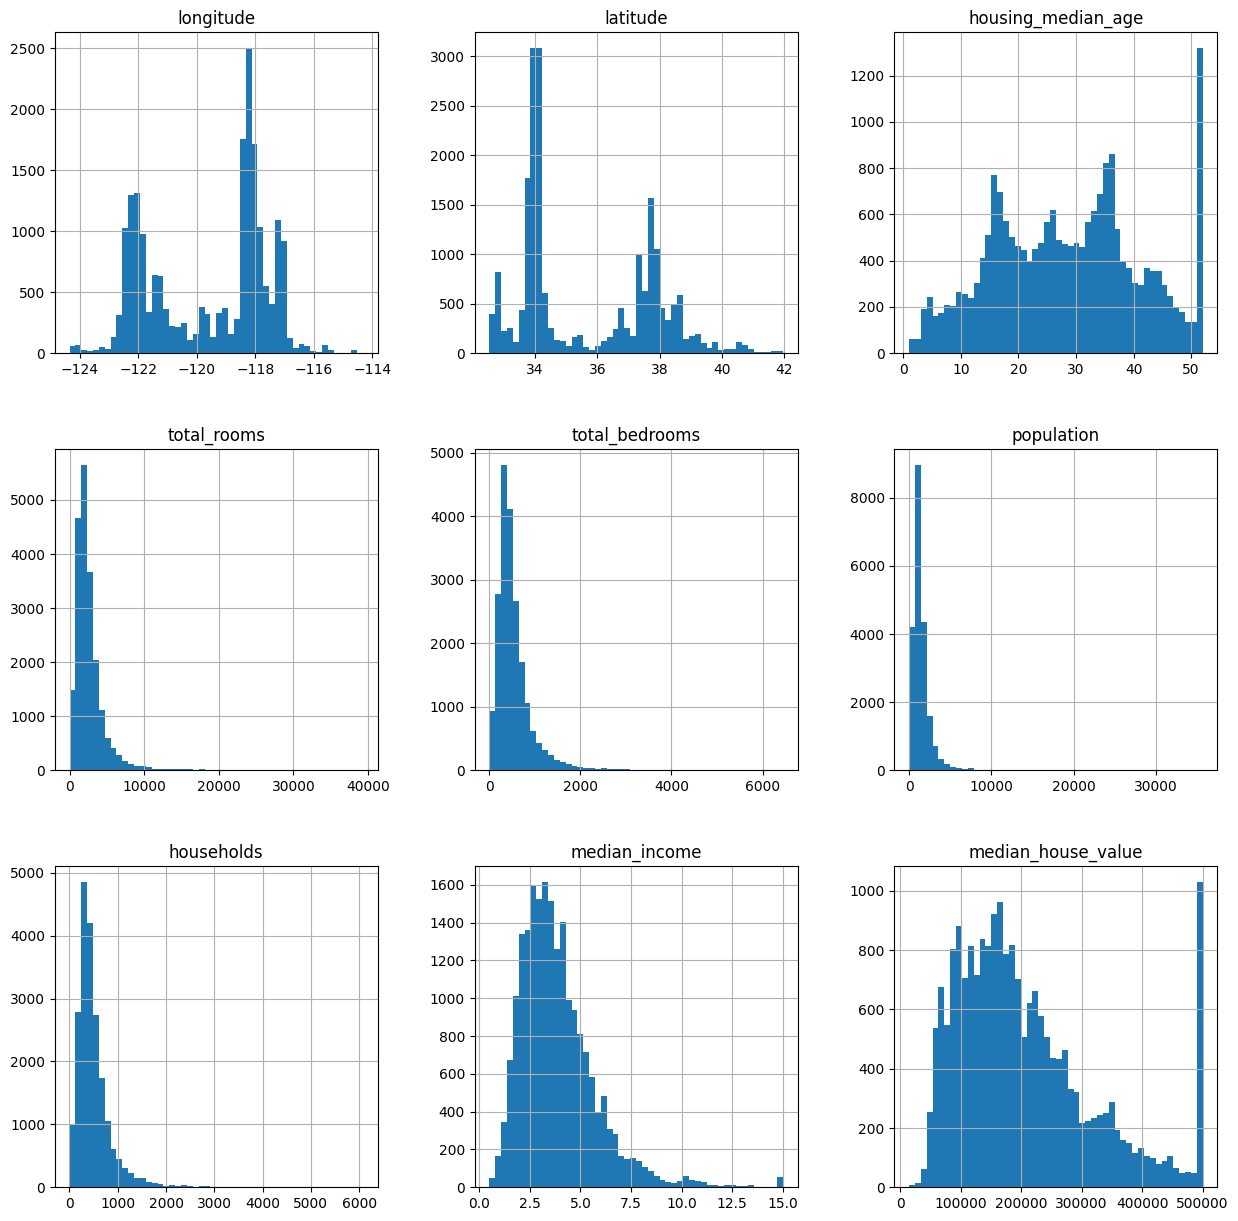

In [228]:
df.hist(bins=50, figsize=(15,15))

In [229]:
# Fill missing values in 'total_bedrooms' with the median of the column
df['total_bedrooms'].fillna(df['total_bedrooms'].median(), inplace=True)

# Convert categorical variable 'ocean_proximity' to numerical using one-hot encoding
# df = pd.get_dummies(df, columns=['ocean_proximity'])
df.drop(columns=['ocean_proximity'], inplace=True)  

# Feature engineering
df['rooms_per_household'] = df['total_rooms'] / df['households']
df['bedrooms_per_room'] = df['total_bedrooms'] / df['total_rooms']
# df['population_per_household'] = df['population'] / df['households']

# # Drop original columns that are no longer needed
# df.drop(columns=['total_rooms', 'total_bedrooms', 'households'], inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_26228\3889378521.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['total_bedrooms'].fillna(df['total_bedrooms'].median(), inplace=True)


<Axes: >

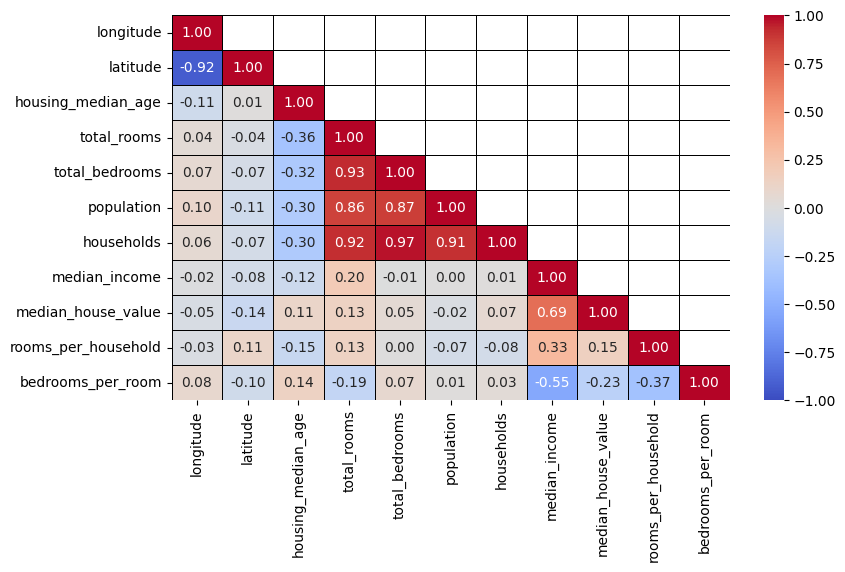

In [230]:
# Split the dataset into features and target variable
plt.figure(figsize=(9,5))

mask = np.triu(np.ones_like(df.corr(), dtype=bool),k=1)

sns.heatmap(df.corr(), 
            mask=mask, 
            annot=True, 
            cmap='coolwarm', 
            fmt='.2f', 
            linewidths=0.5, 
            linecolor='black',
            vmin=-1,vmax=1)

In [231]:
# Split the dataset into features and target variable
X = df.drop(['median_house_value'], axis=1)
y = df['median_house_value']

In [232]:
# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [233]:
# Scale the features using StandardScaler
from sklearn.preprocessing import StandardScaler

rs = StandardScaler()

X_train = rs.fit_transform(X_train)
X_test = rs.fit_transform(X_test)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
# Define the neural network model
model = Sequential([
    Dense(128, input_dim=X_train.shape[1], activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1)  # Linear activation by default for regression
])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

model.compile(
    optimizer=Adam(),
    loss='mean_squared_error',
    metrics=['mae']
)

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
history = model.fit(
    X_train, y_train,
    epochs=300,
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=0
)

In [236]:
y_pred = model.predict(X_test).flatten()

194/194 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


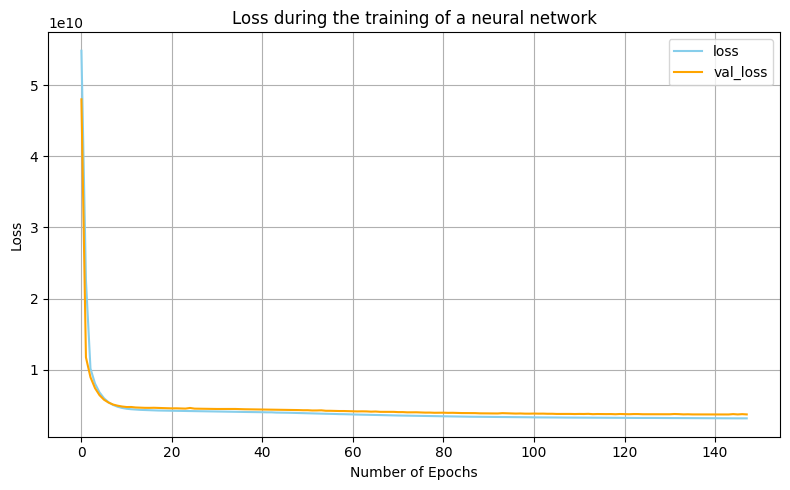

In [237]:
plt.figure(figsize=(8, 5))

plt.plot(history.history['loss'], label='loss', color='skyblue')
plt.plot(history.history['val_loss'], label='val_loss', color='orange')

plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.title('Loss during the training of a neural network')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

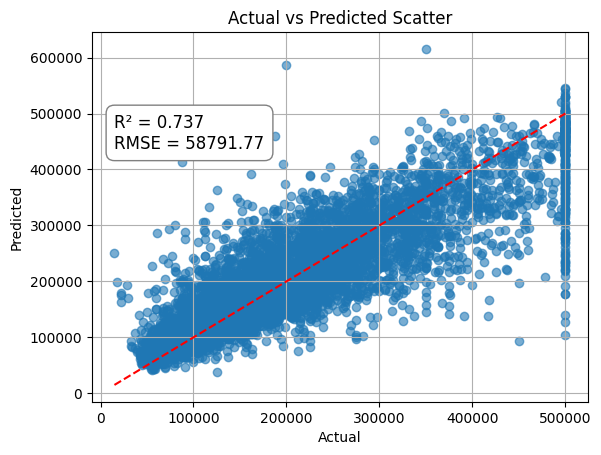

In [238]:
from sklearn.metrics import mean_squared_error, r2_score,mean_squared_error

# Calculate metrics
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))  

# Plot actual vs predicted values
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted Scatter")
plt.grid(True)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal line

plt.text(
    x=y_test.min(), 
    y=y_test.max(), 
    s=f"R² = {r2:.3f}\nRMSE = {rmse:.2f}", 
    fontsize=12, 
    verticalalignment='top', 
    bbox=dict(facecolor='white', edgecolor='gray', boxstyle='round,pad=0.5')
)

plt.show()
